In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv("D:/uni/KAGGLE COMPETITIONS/titanic/train.csv")
test = pd.read_csv("D:/uni/KAGGLE COMPETITIONS/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
columns = train.columns    #risetto le colonne, ora che ne sono state droppate 3

In [6]:
for i in columns:
    print("La variabile %s ha %d missing value" % (i, train[i].isnull().values.sum()))

La variabile Survived ha 0 missing value
La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 177 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 0 missing value
La variabile Cabin ha 687 missing value
La variabile Embarked ha 2 missing value


In [7]:
train.drop(["Cabin"], axis = 1, inplace = True)
columns = train.columns

In [8]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [10]:
for i in columns:
    print("La variabile %s ha %d missing value" % (i, train[i].isnull().values.sum()))

La variabile Survived ha 0 missing value
La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 0 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 0 missing value
La variabile Embarked ha 0 missing value


In [11]:
train['Pclass'] = train['Pclass'].apply(str)
train["Pclass"].describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
cols = ("Pclass", "Embarked")
for i in cols:
    le = LabelEncoder()
    le.fit(list(train[i].values))
    train[i] = le.transform(list(train[i].values))

In [14]:
train = pd.get_dummies(train)

In [15]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,2,22.0,1,0,7.2500,2,0,1
1,1,0,38.0,1,0,71.2833,0,1,0
2,1,2,26.0,0,0,7.9250,2,1,0
3,1,0,35.0,1,0,53.1000,2,1,0
4,0,2,35.0,0,0,8.0500,2,0,1


In [16]:
train.drop(train.columns[-1], axis = 1, inplace = True)

In [17]:
test_Id = test["PassengerId"]
test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True) #Rimuovo l'id pure dal test e lo salvo in una lista, in modo poi da riattaccarlo per la submission
columns_test = test.columns    #risetto le colonne, ora che ne sono state droppate 3

In [18]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
print("TEST:\n")
for i in columns_test:
    print("La variabile %s ha %d missing value" % (i, test[i].isnull().values.sum()))

TEST:

La variabile Pclass ha 0 missing value
La variabile Sex ha 0 missing value
La variabile Age ha 0 missing value
La variabile SibSp ha 0 missing value
La variabile Parch ha 0 missing value
La variabile Fare ha 0 missing value
La variabile Embarked ha 0 missing value


In [19]:
test['Pclass'] = test['Pclass'].apply(str)
test["Pclass"].describe()

count     418
unique      3
top         3
freq      218
Name: Pclass, dtype: object

In [20]:
cols = ("Pclass", "Embarked")
for i in cols:
    le = LabelEncoder()
    le.fit(list(test[i].values))
    test[i] = le.transform(list(test[i].values))

In [21]:
test = pd.get_dummies(test)

In [22]:
test.drop(test.columns[-1], axis = 1, inplace = True)

In [23]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,2,34.5,0,0,7.8292,1,0
1,2,47.0,1,0,7.0000,2,1
2,1,62.0,0,0,9.6875,1,0
3,2,27.0,0,0,8.6625,2,0
4,2,22.0,1,1,12.2875,2,1


In [24]:
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

D:\Programmi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
target_train = train.Survived.values
target_train_nodup = target_train          #lo duplico in modo che più avanti questo non lo trasformerò in un array a due dimensioni, e potrò usarlo per la ROC curve
train.drop(["Survived"], axis = 1, inplace = True)

In [26]:
X = train
y = target_train

NORMALIZZO TEST E TRAIN

In [27]:
df_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
X_norm = df_scaler.fit_transform(X)

In [28]:
test_norm = df_scaler.fit_transform(test)

In [29]:
X_norm.shape

(891, 7)

In [30]:
target_train.shape

(891,)

In [31]:
test_norm.shape

(418, 7)

In [32]:
target_train = np_utils.to_categorical(target_train, 2) #GLI FACCIO CAPIRE CHE IL TARGET è BINARIO E LO METTO SOTTO FORMA DI ARRAY

In [328]:
# creo modello

model = Sequential()
model.add(layers.Dense(100, input_dim=7, activation='relu'))
model.add(layers.Dense(80,  activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(8, activation='relu'))##
model.add(layers.Dense(2, activation='sigmoid'))

In [329]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 100)               800       
_________________________________________________________________
dense_181 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_182 (Dense)            (None, 60)                4860      
_________________________________________________________________
dense_183 (Dense)            (None, 50)                3050      
_________________________________________________________________
dense_184 (Dense)            (None, 40)                2040      
_________________________________________________________________
dense_185 (Dense)            (None, 30)                1230      
_________________________________________________________________
dense_186 (Dense)            (None, 25)                775       
__________

In [332]:
model.compile(loss='binary_crossentropy',
              optimizer= 'RMSProp',
              metrics=['accuracy'])

history = model.fit(X_norm, target_train,
                    batch_size = 35, epochs = 300,
                    verbose = 1, validation_split = 0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/300
623/623 [==============================] - 1s 2ms/step - loss: 0.3491 - acc: 0.8515 - val_loss: 0.5504 - val_acc: 0.8228
Epoch 2/300
623/623 [==============================] - 0s 94us/step - loss: 0.3270 - acc: 0.8636 - val_loss: 0.5748 - val_acc: 0.8172
Epoch 3/300
623/623 [==============================] - 0s 96us/step - loss: 0.3301 - acc: 0.8644 - val_loss: 0.6127 - val_acc: 0.8246
Epoch 4/300
623/623 [==============================] - 0s 93us/step - loss: 0.3290 - acc: 0.8636 - val_loss: 0.5957 - val_acc: 0.8209
Epoch 5/300
623/623 [==============================] - 0s 93us/step - loss: 0.3353 - acc: 0.8604 - val_loss: 0.5941 - val_acc: 0.8116
Epoch 6/300
623/623 [==============================] - 0s 98us/step - loss: 0.3256 - acc: 0.8596 - val_loss: 0.6088 - val_acc: 0.8153
Epoch 7/300
623/623 [==============================] - 0s 90us/step - loss: 0.3278 - acc: 0.8620 - val_loss: 0.6195 - val_acc: 0.7985
Epoch 8/300
623/6

623/623 [==============================] - 0s 98us/step - loss: 0.3108 - acc: 0.8684 - val_loss: 0.6493 - val_acc: 0.8284
Epoch 62/300
623/623 [==============================] - 0s 83us/step - loss: 0.3149 - acc: 0.8555 - val_loss: 0.6947 - val_acc: 0.8246
Epoch 63/300
623/623 [==============================] - 0s 91us/step - loss: 0.3275 - acc: 0.8628 - val_loss: 0.7088 - val_acc: 0.7985
Epoch 64/300
623/623 [==============================] - 0s 82us/step - loss: 0.3114 - acc: 0.8684 - val_loss: 0.6497 - val_acc: 0.8172
Epoch 65/300
623/623 [==============================] - 0s 83us/step - loss: 0.3212 - acc: 0.8636 - val_loss: 0.6089 - val_acc: 0.8060
Epoch 66/300
623/623 [==============================] - 0s 85us/step - loss: 0.3266 - acc: 0.8668 - val_loss: 0.6676 - val_acc: 0.8078
Epoch 67/300
623/623 [==============================] - 0s 85us/step - loss: 0.3103 - acc: 0.8764 - val_loss: 0.5923 - val_acc: 0.8060
Epoch 68/300
623/623 [==============================] - 0s 80us/step

623/623 [==============================] - 0s 96us/step - loss: 0.3327 - acc: 0.8732 - val_loss: 0.6808 - val_acc: 0.8097
Epoch 122/300
623/623 [==============================] - 0s 90us/step - loss: 0.3065 - acc: 0.8652 - val_loss: 0.7108 - val_acc: 0.8190
Epoch 123/300
623/623 [==============================] - 0s 88us/step - loss: 0.3058 - acc: 0.8604 - val_loss: 0.6680 - val_acc: 0.8097
Epoch 124/300
623/623 [==============================] - 0s 74us/step - loss: 0.3257 - acc: 0.8636 - val_loss: 0.6503 - val_acc: 0.8209
Epoch 125/300
623/623 [==============================] - 0s 83us/step - loss: 0.3085 - acc: 0.8748 - val_loss: 0.7152 - val_acc: 0.8265
Epoch 126/300
623/623 [==============================] - 0s 90us/step - loss: 0.3301 - acc: 0.8684 - val_loss: 0.6933 - val_acc: 0.8190
Epoch 127/300
623/623 [==============================] - 0s 85us/step - loss: 0.3062 - acc: 0.8748 - val_loss: 0.7972 - val_acc: 0.8153
Epoch 128/300
623/623 [==============================] - 0s 82

623/623 [==============================] - 0s 86us/step - loss: 0.3121 - acc: 0.8652 - val_loss: 0.7529 - val_acc: 0.8190
Epoch 182/300
623/623 [==============================] - 0s 86us/step - loss: 0.3026 - acc: 0.8684 - val_loss: 0.7432 - val_acc: 0.8190
Epoch 183/300
623/623 [==============================] - 0s 90us/step - loss: 0.3085 - acc: 0.8620 - val_loss: 0.7302 - val_acc: 0.8172
Epoch 184/300
623/623 [==============================] - 0s 82us/step - loss: 0.3085 - acc: 0.8732 - val_loss: 0.6789 - val_acc: 0.8284
Epoch 185/300
623/623 [==============================] - 0s 80us/step - loss: 0.2957 - acc: 0.8732 - val_loss: 0.7392 - val_acc: 0.8134
Epoch 186/300
623/623 [==============================] - 0s 83us/step - loss: 0.3101 - acc: 0.8724 - val_loss: 0.6877 - val_acc: 0.8134
Epoch 187/300
623/623 [==============================] - 0s 83us/step - loss: 0.3193 - acc: 0.8724 - val_loss: 0.6457 - val_acc: 0.8172
Epoch 188/300
623/623 [==============================] - 0s 91

623/623 [==============================] - 0s 120us/step - loss: 0.2984 - acc: 0.8692 - val_loss: 0.6653 - val_acc: 0.7985
Epoch 242/300
623/623 [==============================] - 0s 147us/step - loss: 0.3156 - acc: 0.8636 - val_loss: 0.6610 - val_acc: 0.8190
Epoch 243/300
623/623 [==============================] - 0s 133us/step - loss: 0.3149 - acc: 0.8644 - val_loss: 0.7669 - val_acc: 0.8060
Epoch 244/300
623/623 [==============================] - 0s 101us/step - loss: 0.2851 - acc: 0.8780 - val_loss: 0.7043 - val_acc: 0.8209
Epoch 245/300
623/623 [==============================] - 0s 123us/step - loss: 0.2906 - acc: 0.8764 - val_loss: 0.8710 - val_acc: 0.8022
Epoch 246/300
623/623 [==============================] - 0s 99us/step - loss: 0.3081 - acc: 0.8692 - val_loss: 0.6896 - val_acc: 0.8134
Epoch 247/300
623/623 [==============================] - 0s 181us/step - loss: 0.2919 - acc: 0.8756 - val_loss: 0.7003 - val_acc: 0.8358
Epoch 248/300
623/623 [==============================] -

TESTO IL MODELLO SULLO STESSO TRAIN PER OSSERVARE LA ROC

In [333]:
model.evaluate(X_norm, target_train, verbose = 1)

891/891 [==============================] - 0s 45us/step


[0.40940891291557335, 0.8630751964754261]

In [334]:
pred_train = model.predict(X_norm)

In [335]:
pred_train = pd.DataFrame(pred_train)

In [336]:
pred_train.head()

,0,1
0,9.188532e-01,0.091161
1,6.394208e-11,1.000000
2,5.967721e-01,0.449988
3,1.661946e-06,0.999997
4,8.248112e-01,0.162820


In [337]:
col_train = pred_train[1]
surv_train = []
for i in col_train:
    if i < 0.5:
        surv_train.append("0")
    else:
        surv_train.append("1")

In [338]:
trainpr = pd.DataFrame({"Probability(1)" : pred_train[1], "Survived": surv_train})

In [339]:
trainpr.head()

,Probability(1),Survived
0,0.091161,0
1,1.000000,1
2,0.449988,0
3,0.999997,1
4,0.162820,0


In [340]:
trainpr["Survived"].astype(int)
surv_array = np.array(trainpr["Survived"])

In [341]:
confusion_matrix(surv_array.astype(int), target_train_nodup)

array([[505,  77],
       [ 44, 265]], dtype=int64)

In [342]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_norm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(target_train_nodup, preds)
roc_auc = metrics.auc(fpr, tpr)

ROC CURVE ON TRAIN 

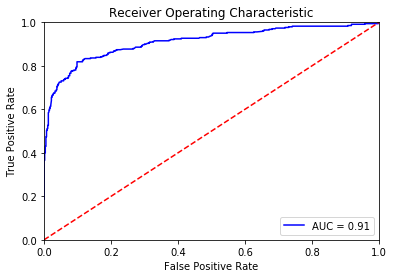

In [343]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CLASSIFICATION ON TEST

In [344]:
pred = model.predict(test_norm)

In [345]:
pred = pd.DataFrame(pred)

In [346]:
pred.head(10)

,0,1
0,0.966041,0.037359
1,0.983713,0.017622
2,0.999995,0.000005
3,0.890255,0.111064
4,0.773684,0.254826
5,0.872021,0.119464
6,0.413455,0.586532
7,0.955753,0.055930
8,0.556166,0.425679
9,0.991292,0.012794


In [347]:
col1 = pred[1]
surv = []
for i in col1:
    if i < 0.5:
        surv.append("0")
    else:
        surv.append("1")

In [348]:
consegna = pd.DataFrame({"PassengerId" : test_Id, "Prob(Survived)" : pred[1], "Survived" : surv})

In [349]:
consegna.set_index("PassengerId", inplace = True)

In [350]:
consegna.drop("Prob(Survived)", axis = 1).to_csv("subm.csv")